# Introduction
In this Part, machine learning has been performed! More specifically, unsupervised machine learning. 

In unsupervised machine learning, let the model figure out the clusters and where each row of data goes. 

This is an exciting part, where the following has been done:
1. Import the libraries required and load the CSV from previous Part
2. Scale the R/F/M values
3. Plot the scaled quantities
4. Perform KMeans clustering with an arbitrary number of clusters
5. Optimize the number of clusters
6. Reperform the KMeans clustering with the optimized number of clusters
7. Compare the clustering analysis with the RFM-segmented customers in Part IV

### Step 1:  Import library
Import the following:
1. pandas as pd
2. StandardScaler from sklearn.preprocessing
3. KMeans from sklearn.cluster
4. matplotlib.pyplot as plt
5. mplot3d from mpl_toolkits

In [1]:
# Step 1: Import the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Step 2: Read the CSV from Part IV
Make sure Customer ID is the index, as the values in Recency, Frequency, and Monetary will be transformed <strong>only</strong> using the StandardScaler. 

In [2]:
# Step 2: Read the CSV from Part IV
data = pd.read_csv('RFM Segmentation.csv', parse_dates=True, index_col=['Customer ID'])
display(data)

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment
Customer ID,,,,,,,,
12346.0,347,12,77556.46,2,5,5,255,Can't Lose
12347.0,24,8,5633.32,5,4,5,545,Champions
12348.0,97,5,2019.40,3,4,4,344,Loyal Customers
12349.0,40,4,4428.69,5,3,5,535,Potential Loyalists
12350.0,332,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...
18283.0,25,22,2736.65,5,5,4,554,Champions
18284.0,453,1,461.68,1,2,2,122,Hibernating
18285.0,682,1,427.00,1,2,2,122,Hibernating


### Step 3: Scale Recency, Frequency, and Monetary
Time to scale values. Before performing clustering, values need to be transformed to be on the same scale, i.e. mean 0 and standard deviation of 1. 

To scale the quantities into a similar range of values, the StandardScaler will be used. 

1. Declare a StandardScaler object
2. Perform a fit_transform method on the entire DataFrame

In [3]:
# Step 3: Scale DataFrame values with a StandardScaler
cols_to_scale = ['Recency', 'Frequency', 'Monetary']
features = data[cols_to_scale]
scaler = StandardScaler()
df_scaled = scaler.fit_transform (features)
df_scaled

array([[ 0.59298505,  0.4388927 ,  5.05805027],
       [-0.94998781,  0.13143374,  0.17743068],
       [-0.60126639, -0.09916048, -0.06780567],
       ...,
       [ 2.19328197, -0.40661944, -0.17586406],
       [ 1.31431292, -0.3297547 , -0.11686556],
       [-0.75890758,  0.054569  ,  0.079013  ]])

### Step 4: Turn NumPy array into a DataFrame
Need a proper DataFrame when creating a column for Labels.

Give it a column name of Recency Scaled, Frequency Scaled, and Monetary Scaled.

In [4]:
# Step 4: Turn the NumPy array into a DataFrame
from pandas import DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = ['Recency Scaled', 'Frequency Scaled', 'Monetary Scaled'])
df_scaled

,Recency Scaled,Frequency Scaled,Monetary Scaled
0,0.592985,0.438893,5.058050
1,-0.949988,0.131434,0.177431
2,-0.601266,-0.099160,-0.067806
3,-0.873556,-0.176025,0.095686
4,0.521330,-0.406619,-0.182148
...,...,...,...
5873,-0.945211,1.207540,-0.019134
5874,1.099348,-0.406619,-0.173511
5875,2.193282,-0.406619,-0.175864
5876,1.314313,-0.329755,-0.116866


### Step 5: Plot scaled Recency, Frequency, Monetary as 3D coordinates
Let's try plotting the three sets of coordinates in a 3D plot. 

Plot the scaled Recency in the x-axis, scaled Frequency in the y-axis, and scaled Monetary in the z-axis.  

By plotting the point on a 3D plot, can intuitively grasp where possible clusters may be. 

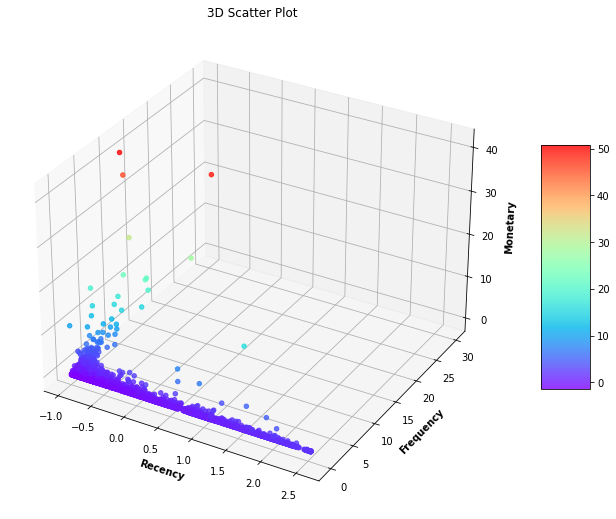

In [5]:
# Step 5: Plot a 3D scatter plot using the scaled values
import numpy as np

# Creating dataset
x = df_scaled['Recency Scaled']
y = df_scaled['Frequency Scaled']
z = df_scaled['Monetary Scaled']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
 
# Creating color map
cmap = plt.get_cmap('hsv')
    
# Creating plot
scatter = ax.scatter3D(x, y, z, alpha = 0.8, c = (x + y + z), cmap = 'rainbow', marker = 'o')
plt.title("3D Scatter Plot")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
fig.colorbar(scatter, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

### Step 6: Perform KMeans clustering with 10 clusters
After done plotting, let's start clustering! Don't have a fixed number of clusters, so let's start with 10 clusters like Part IV's RFM segments

Clustering is not unlike training a supervised model where the following has to be done:
1. Declare a variable containing the KMeans object with 10 clusters in the parameter.
2. Fit the DataFrame into the model
3. Predict the labels for each of the rows in the DataFrame
4. Create a column named 'Labels' in the DataFrame
5. Get the <strong>cluster centers</strong> from the trained KMeans model

In [6]:
# Step 6: Train a KMeans model to predict the labels for the dataset
from sklearn.cluster import KMeans
from collections import Counter
kmeans = KMeans(n_clusters=10, init = 'k-means++', random_state=42).fit(df_scaled)
df_scaled['Labels'] = kmeans.labels_ # same as kmeans.predict(df_scaled)
Counter(df_scaled['Labels'])

Counter({0: 511,
         1: 2633,
         5: 940,
         9: 1089,
         2: 632,
         4: 10,
         8: 54,
         6: 6,
         3: 2,
         7: 1})

### Step 7: Turn the cluster center NumPy into a DataFrame
Similar to the results of scaling, for easier manipulation, can consider turning the NumPy array into a DataFrame first before plotting. 

In [7]:
# Step 7: Create a DataFrame containing the cluster centers' coordinates
centers = pd.DataFrame(kmeans.cluster_centers_[:, 0:3], columns = ['Recency Scaled', 'Frequency Scaled', 'Monetary Scaled'])
centers

,Recency Scaled,Frequency Scaled,Monetary Scaled
0,-0.812873,1.171209,0.471561
1,-0.755030,-0.100094,-0.083072
2,2.017065,-0.365862,-0.162764
3,-0.957153,10.892497,38.387293
4,-0.915593,6.034646,11.817947
5,0.092704,-0.237436,-0.132813
6,-0.660183,16.234597,4.867083
7,-0.954765,30.108682,19.879514
8,-0.871079,4.256508,2.300088
9,1.025454,-0.295923,-0.150226


### Step 8: Plot both the scaled values and cluster centers
Now that the labels have been created from the unsupervised machine learning, and the cluster center coordinates, it's time to plot all of them and see how it looks.

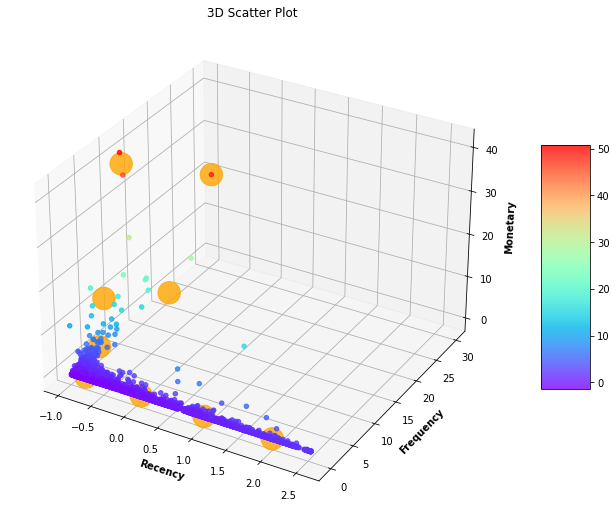

In [8]:
# Step 8: Plot 3D scatter plot with the labels and the cluster centers
# Creating dataset
x1 = df_scaled['Recency Scaled']
y1 = df_scaled['Frequency Scaled']
z1 = df_scaled['Monetary Scaled']

x2 = centers['Recency Scaled']
y2 = centers['Frequency Scaled']
z2 = centers['Monetary Scaled']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax  = plt.axes(projection ="3d")
 
# Creating color map
cmap = plt.get_cmap('hsv')
    
# Creating plot
plt.title("3D Scatter Plot")

scatter_scaled = ax.scatter3D(x1, y1, z1, alpha = 0.8, c = (x1 + y1 + z1), cmap = 'rainbow', marker = 'o')
scatter_centers = ax.scatter3D(x2, y2, z2, alpha = 0.8, s = 500, c = 'orange', marker = 'o')

ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
 
fig.colorbar(scatter, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

## Optimizing the number of clusters
The number of clusters is arbitrary, and there should be a better way to assess the number of clusters to be used. 

To do this, the Within-Cluster-Sum-of-Squares (WCSS) method is used. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

### Step 9: Plot the WCSS curve
The WCSS for each KMeans run can be obtained by retrieving the inertia_ attribute. So to construct a WCSS plot, these are the steps:

1. Create an empty list
2. Use a for loop to loop through a range between 1 to 15
3. In each loop
    - declare a KMeans classifier object, with the current value in the range as the number of clusters
    - perform a KMeans clustering
    - append the .inertia_ of the trained model into the list that has been created in 1
4. Plot a line plot containing the range of clusters (x-axis), against the list of WCSS scores (y-axis)

The best number of clusters lies at the elbow point, the point where there is no more dramatic decrease in the WCSS. 

It's from visual inspection, so either usually either one value or the other. Both are fine! 

In [9]:
# Step 9a: Create a list of WCSS based on different number of clusters, between 1 to 14
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

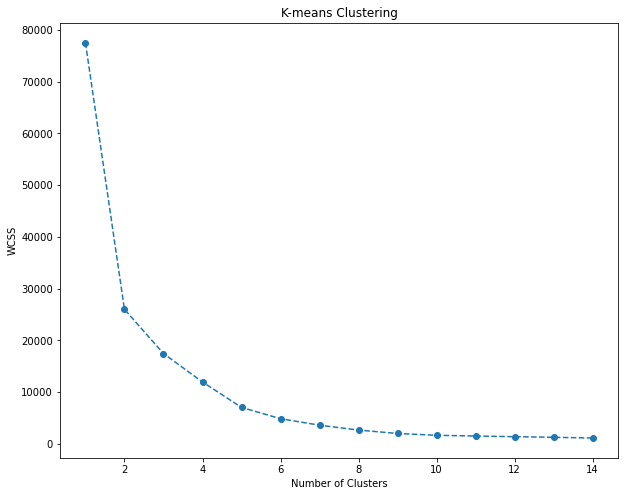

In [10]:
# Step 9b: Plot the WCSS Elbow Point Graph
plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

### Step 10: Repeat Steps 6 - 8 with the optimized number of clusters
Now that the best number of clusters has been figured out, it's time to redo the analysis in Steps 6-8.

In [11]:
# Step 10a: Perform the clustering step with the new number of clusters
df_scaled_opt = df_scaled.copy()
kmeans_opt = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42).fit(df_scaled_opt)
df_scaled_opt['Labels'] = kmeans_opt.labels_ # same as kmeans_opt.predict(df_scaled)
Counter(df_scaled_opt['Labels'])

Counter({0: 3776, 3: 942, 1: 1143, 2: 17})

In [12]:
centers_opt = pd.DataFrame(kmeans_opt.cluster_centers_[:, 0:3], columns = ['Recency Scaled', 'Frequency Scaled', 'Monetary Scaled'])
centers_opt

,Recency Scaled,Frequency Scaled,Monetary Scaled
0,-0.299632,0.027943,-0.021160
1,0.931287,-0.080331,-0.034376
2,-0.834216,12.253455,13.130037
3,0.086125,-0.235673,-0.110425


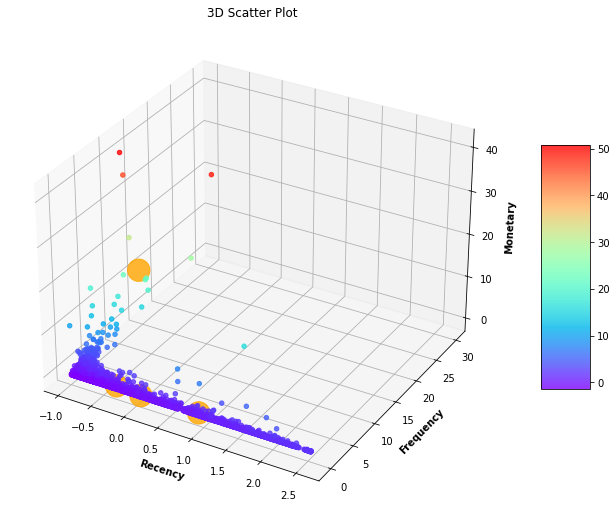

In [13]:
# Step 10b: Plot the values with the labels, and the cluster centers
x1 = df_scaled['Recency Scaled']
y1 = df_scaled['Frequency Scaled']
z1 = df_scaled['Monetary Scaled']

x2 = centers_opt['Recency Scaled']
y2 = centers_opt['Frequency Scaled']
z2 = centers_opt['Monetary Scaled']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax  = plt.axes(projection ="3d")
 
# Creating color map
cmap = plt.get_cmap('hsv')
    
# Creating plot
plt.title("3D Scatter Plot")

scatter_scaled      = ax.scatter3D(x1, y1, z1, alpha = 0.8, c = (x1 + y1 + z1), cmap = 'rainbow', marker = 'o')
scatter_centers_opt = ax.scatter3D(x2, y2, z2, alpha = 0.8, s = 500, c = 'orange', marker = 'o')

ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
 
fig.colorbar(scatter, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

### Step 11: Load the CSV exported from Part IV
Let's load CSV from Part IV and compare it with the clusters. 

In [14]:
# Step 11: Load the CSV that exported in Part IV
rfm_segment = pd.read_csv('RFM Segmentation.csv')
display(rfm_segment)

,Customer ID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment
0,12346.0,347,12,77556.46,2,5,5,255,Can't Lose
1,12347.0,24,8,5633.32,5,4,5,545,Champions
2,12348.0,97,5,2019.40,3,4,4,344,Loyal Customers
3,12349.0,40,4,4428.69,5,3,5,535,Potential Loyalists
4,12350.0,332,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...,...
5873,18283.0,25,22,2736.65,5,5,4,554,Champions
5874,18284.0,453,1,461.68,1,2,2,122,Hibernating
5875,18285.0,682,1,427.00,1,2,2,122,Hibernating
5876,18286.0,498,2,1296.43,1,3,4,134,At Risk


### Step 12: Merge the two DataFrames together
It's time to combine the two DataFrames together.

In [15]:
# Step 12: Merge the two DataFrames together
import pandas as pd
df1 = rfm_segment
df2 = pd.DataFrame(df_scaled_opt, columns = ['Labels'])
merged_df = pd.merge(df1, df2, left_index=True, right_index=True).set_index('Customer ID')
merged_df

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Labels
Customer ID,,,,,,,,,
12346.0,347,12,77556.46,2,5,5,255,Can't Lose,0
12347.0,24,8,5633.32,5,4,5,545,Champions,0
12348.0,97,5,2019.40,3,4,4,344,Loyal Customers,0
12349.0,40,4,4428.69,5,3,5,535,Potential Loyalists,0
12350.0,332,1,334.40,2,1,2,212,Hibernating,3
...,...,...,...,...,...,...,...,...,...
18283.0,25,22,2736.65,5,5,4,554,Champions,0
18284.0,453,1,461.68,1,2,2,122,Hibernating,1
18285.0,682,1,427.00,1,2,2,122,Hibernating,0


### Step 13: Compare the Labels to the Segment
Final step! Time to compare the labels to the segment and see how they differ and how they are similar. 

To do this:
1. Slice the DataFrame based on label value
2. Perform a value count on the Segment 

That way, the breakdown of Segments per label can be seen.

In [16]:
# Step 13: Compare the labels to segment
lab0 = merged_df.loc[merged_df['Labels'] == 0]
lab1 = merged_df.loc[merged_df['Labels'] == 1]
lab2 = merged_df.loc[merged_df['Labels'] == 2]
lab3 = merged_df.loc[merged_df['Labels'] == 3]

display(lab0, lab1, lab2, lab3)

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Labels
Customer ID,,,,,,,,,
12346.0,347,12,77556.46,2,5,5,255,Can't Lose,0
12347.0,24,8,5633.32,5,4,5,545,Champions,0
12348.0,97,5,2019.40,3,4,4,344,Loyal Customers,0
12349.0,40,4,4428.69,5,3,5,535,Potential Loyalists,0
12352.0,58,10,2849.84,4,5,4,454,Loyal Customers,0
...,...,...,...,...,...,...,...,...,...
18279.0,541,1,231.34,1,2,1,121,Hibernating,0
18282.0,29,2,178.05,5,3,1,531,Potential Loyalists,0
18283.0,25,22,2736.65,5,5,4,554,Champions,0


,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Labels
Customer ID,,,,,,,,,
12351.0,397,1,300.93,2,1,2,212,Hibernating,1
12369.0,435,3,1791.15,1,3,4,134,At Risk,1
12376.0,411,2,503.15,2,2,2,222,Hibernating,1
12385.0,401,1,1938.40,2,1,4,214,Hibernating,1
12386.0,359,2,660.80,2,2,3,223,Hibernating,1
...,...,...,...,...,...,...,...,...,...
18264.0,520,1,603.25,1,2,2,122,Hibernating,1
18266.0,456,1,251.10,1,2,1,121,Hibernating,1
18269.0,388,1,337.20,2,2,2,222,Hibernating,1


,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Labels
Customer ID,,,,,,,,,
12748.0,22,336,56599.39,5,5,5,555,Champions,2
13089.0,24,203,116737.86,5,5,5,555,Champions,2
13694.0,25,143,196482.81,5,5,5,555,Champions,2
14156.0,31,156,313946.37,5,5,5,555,Champions,2
14606.0,23,192,30861.06,5,5,5,555,Champions,2
14646.0,23,151,528602.52,5,5,5,555,Champions,2
14911.0,23,398,295972.63,5,5,5,555,Champions,2
15061.0,25,127,137818.52,5,5,5,555,Champions,2
15311.0,22,208,116771.16,5,5,5,555,Champions,2


,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment,Labels
Customer ID,,,,,,,,,
12350.0,332,1,334.40,2,1,2,212,Hibernating,3
12353.0,226,2,406.76,2,2,2,222,Hibernating,3
12354.0,254,1,1079.40,2,1,3,213,Hibernating,3
12355.0,236,2,947.61,2,2,3,223,Hibernating,3
12361.0,309,4,511.25,2,3,2,232,At Risk,3
...,...,...,...,...,...,...,...,...,...
18239.0,240,6,2150.36,2,4,4,244,At Risk,3
18250.0,332,1,349.27,2,2,2,222,Hibernating,3
18262.0,162,3,577.54,3,3,2,332,Need Attention,3


In [17]:
display(Counter(lab0['Segment']), Counter(lab1['Segment']), Counter(lab2['Segment']), Counter(lab3['Segment']))

Counter({"Can't Lose": 10,
         'Champions': 790,
         'Loyal Customers': 1038,
         'Potential Loyalists': 712,
         'About to Sleep': 260,
         'Hibernating': 541,
         'New Customers': 56,
         'Need Attention': 169,
         'Promising': 110,
         'At Risk': 90})

Counter({'Hibernating': 673,
         'At Risk': 388,
         'Champions': 47,
         'Loyal Customers': 5,
         "Can't Lose": 30})

Counter({'Champions': 15, 'Loyal Customers': 1, "Can't Lose": 1})

Counter({'Hibernating': 308,
         'At Risk': 272,
         'Loyal Customers': 103,
         'About to Sleep': 128,
         'Need Attention': 100,
         "Can't Lose": 30,
         'Potential Loyalists': 1})

# The end
And that's the end! To recap, the following has been done:
1. Performed data collection and data cleaning
2. Explored the data and answered business questions from a hypothetical business owner
3. Performed data cleaning
4. Performed a RFM segmentation
5. Trained an unsupervised classifier to segment  customers
6. Compared the RFM-segmented customers with the ones that machine learning has been used on